In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, accuracy_score

from imblearn.over_sampling import SMOTE

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(style = 'darkgrid',font_scale=1.5)
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [234]:
df = pd.read_excel("Train_Breast_Cancer.xlsx")
df.head()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [235]:
df.shape

(273, 10)

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        273 non-null    object
 1   Age          273 non-null    object
 2   Menopause    273 non-null    object
 3   Tumor-size   273 non-null    object
 4   Inv-nodes    273 non-null    object
 5   Node-caps    273 non-null    object
 6   Deg-malig    273 non-null    int64 
 7   Breast       273 non-null    object
 8   Breast-quad  273 non-null    object
 9   Irradiat     273 non-null    object
dtypes: int64(1), object(9)
memory usage: 21.5+ KB


In [237]:
df.columns

Index(['Class', 'Age', 'Menopause', 'Tumor-size', 'Inv-nodes', 'Node-caps',
       'Deg-malig', 'Breast', 'Breast-quad', 'Irradiat'],
      dtype='object')

# Univariate and Bivariate Distribution 

In [238]:
cls = df["Class"].value_counts().reset_index()
cls

,index,Class
0,no-recurrence-events,189
1,recurrence-events,84


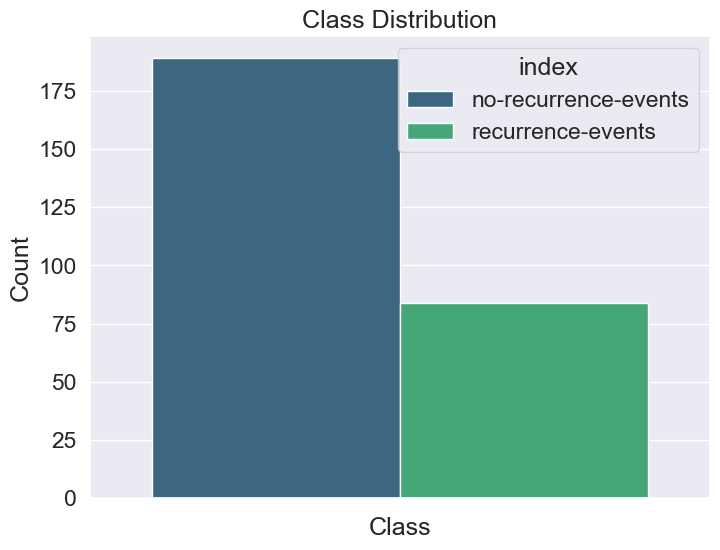

In [239]:
plt.figure(figsize=(8, 6))
sns.barplot(hue='index', y='Class', data=cls, palette='viridis', legend = True)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

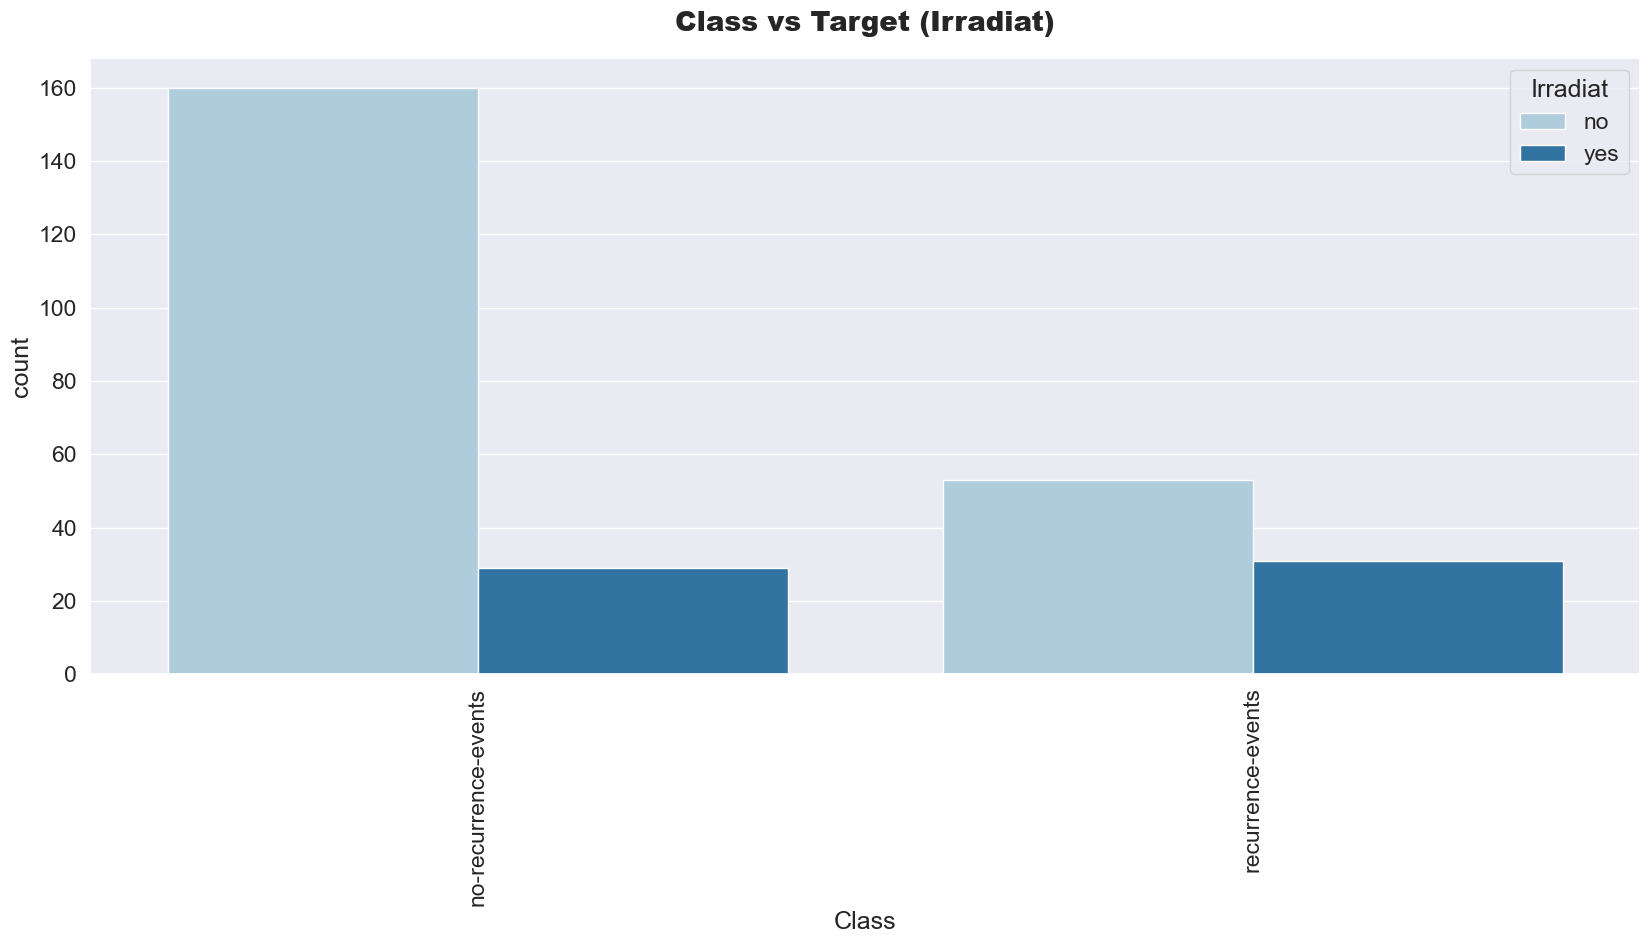

In [240]:
sns.countplot(x='Class', hue='Irradiat', data=df, palette='Paired', order=df['Class'].value_counts().index)
plt.title('Class vs Target (Irradiat)', fontweight='black', pad=20, fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [241]:
age = df["Age"].value_counts().reset_index()
age

,index,Age
0,50-59,92
1,40-49,86
2,60-69,55
3,30-39,33
4,70-79,6
5,20-29,1


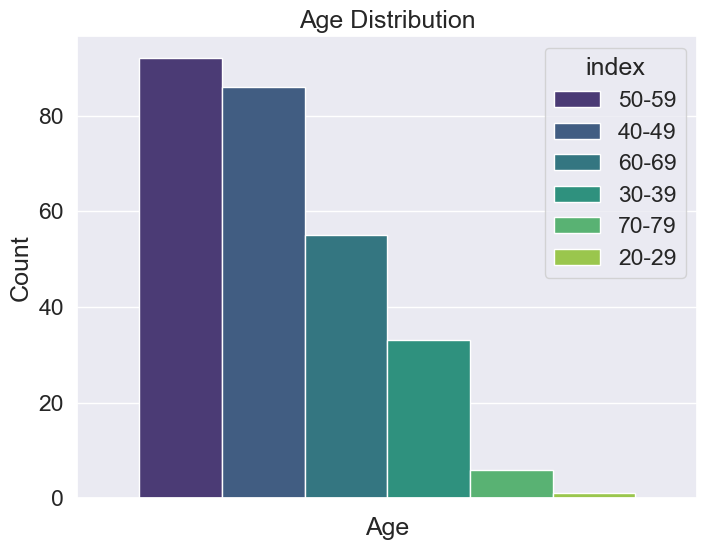

In [242]:
plt.figure(figsize=(8, 6))
sns.barplot(hue='index', y='Age', data=age, palette='viridis', legend = True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

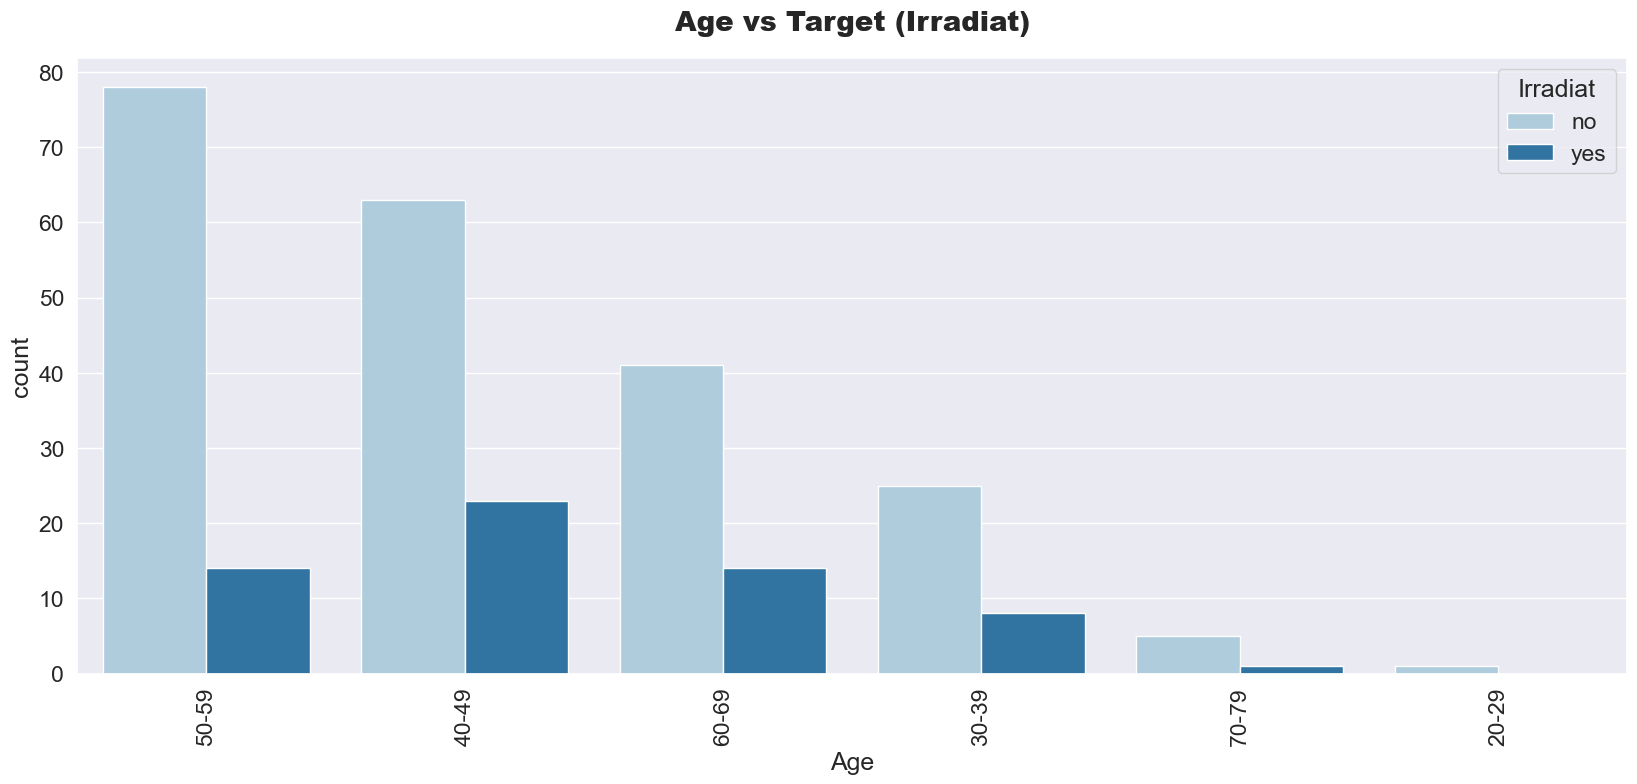

In [243]:
sns.countplot(x='Age', hue='Irradiat', data=df, palette='Paired', order=df['Age'].value_counts().index)
plt.title('Age vs Target (Irradiat)', fontweight='black', pad=20, fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [244]:
menopause = df["Menopause"].value_counts().reset_index()
menopause

,index,Menopause
0,premeno,142
1,ge40,125
2,lt40,6


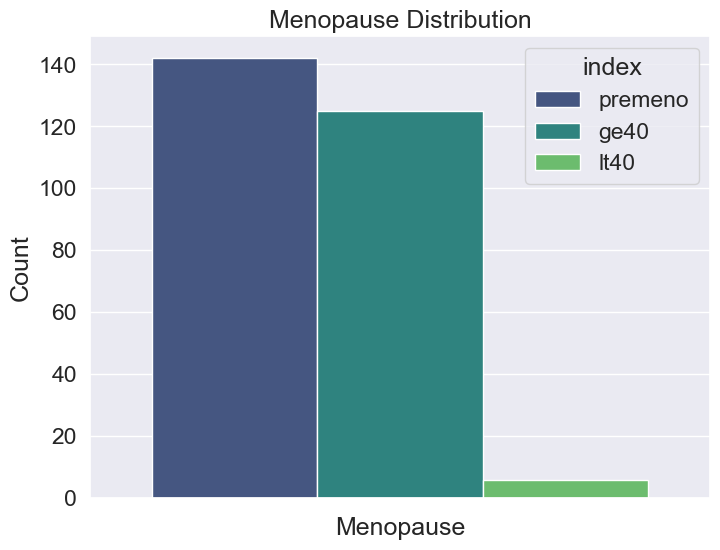

In [245]:
plt.figure(figsize=(8, 6))
sns.barplot(hue='index', y='Menopause', data=menopause, palette='viridis', legend = True)
plt.xlabel('Menopause')
plt.ylabel('Count')
plt.title('Menopause Distribution')
plt.show()

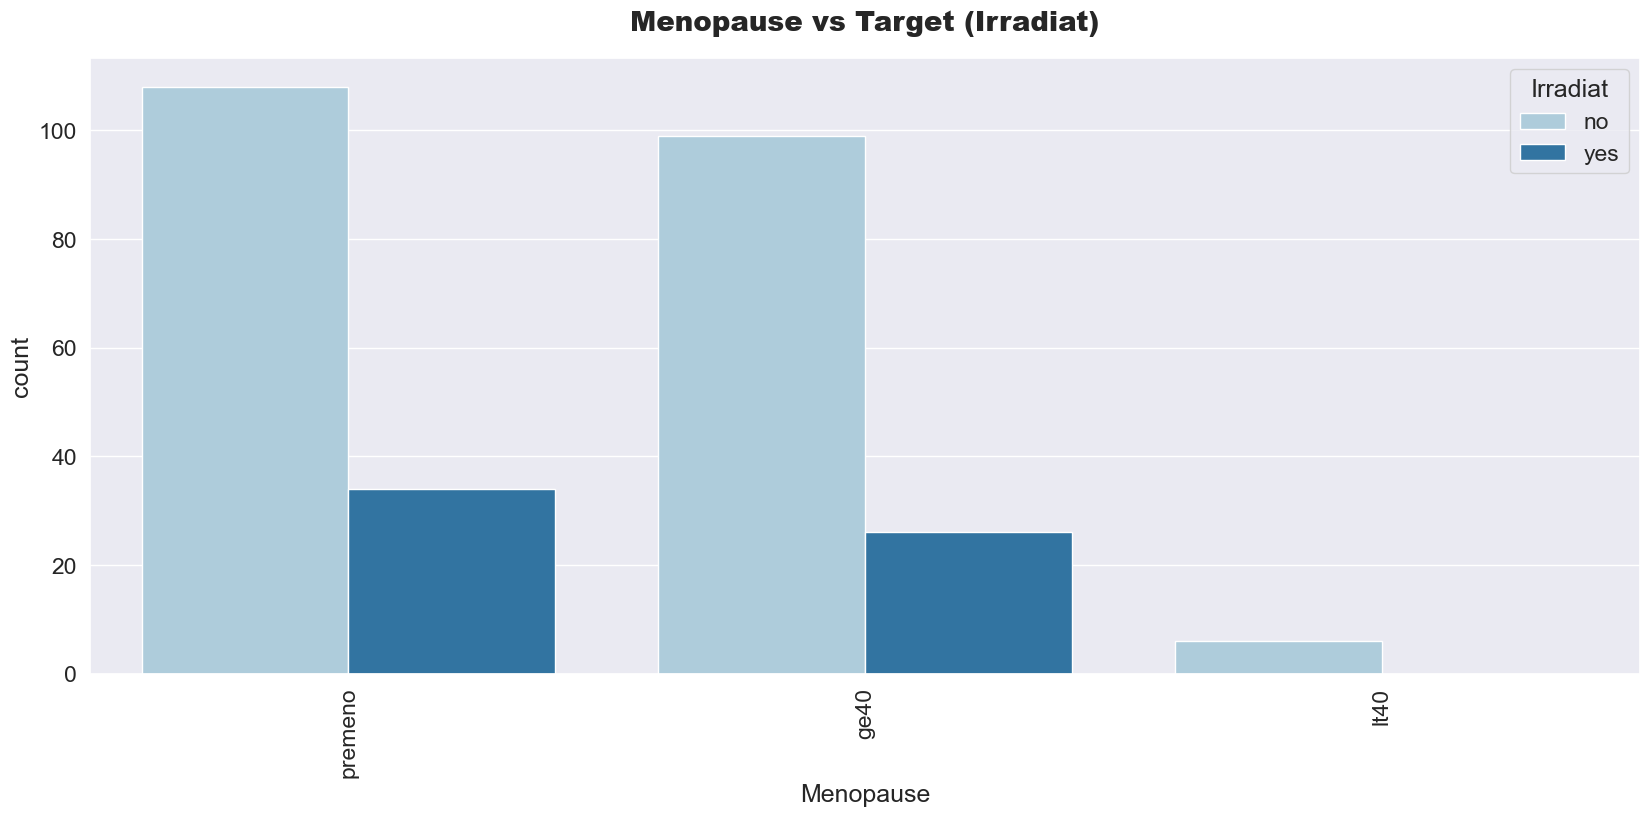

In [246]:
sns.countplot(x='Menopause', hue='Irradiat', data=df, palette='Paired', order=df['Menopause'].value_counts().index)
plt.title('Menopause vs Target (Irradiat)', fontweight='black', pad=20, fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [247]:
tumor = df["Tumor-size"].value_counts().reset_index()
tumor

,index,Tumor-size
0,30-34,57
1,25-29,51
2,20-24,48
3,15-19,30
4,10-14,28
5,40-44,19
6,35-39,17
7,0-4,8
8,50-54,8
9,5-9,4


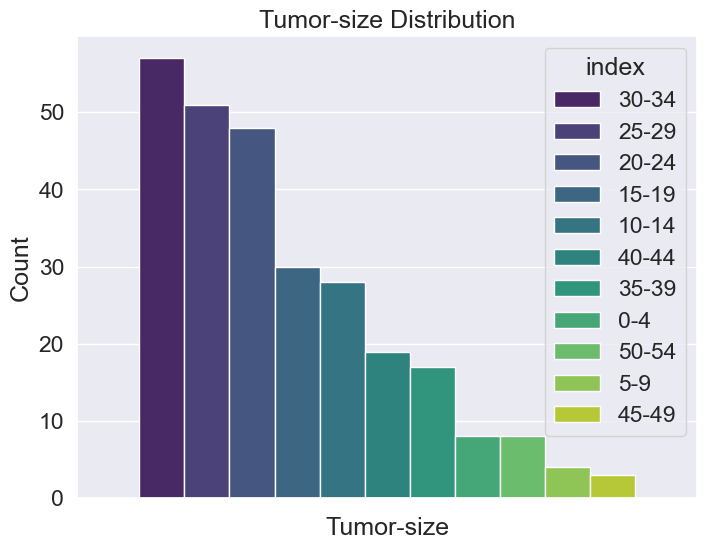

In [248]:
plt.figure(figsize=(8, 6))
sns.barplot(hue='index', y='Tumor-size', data=tumor, palette='viridis', legend = True)
plt.xlabel('Tumor-size')
plt.ylabel('Count')
plt.title('Tumor-size Distribution')
plt.show()

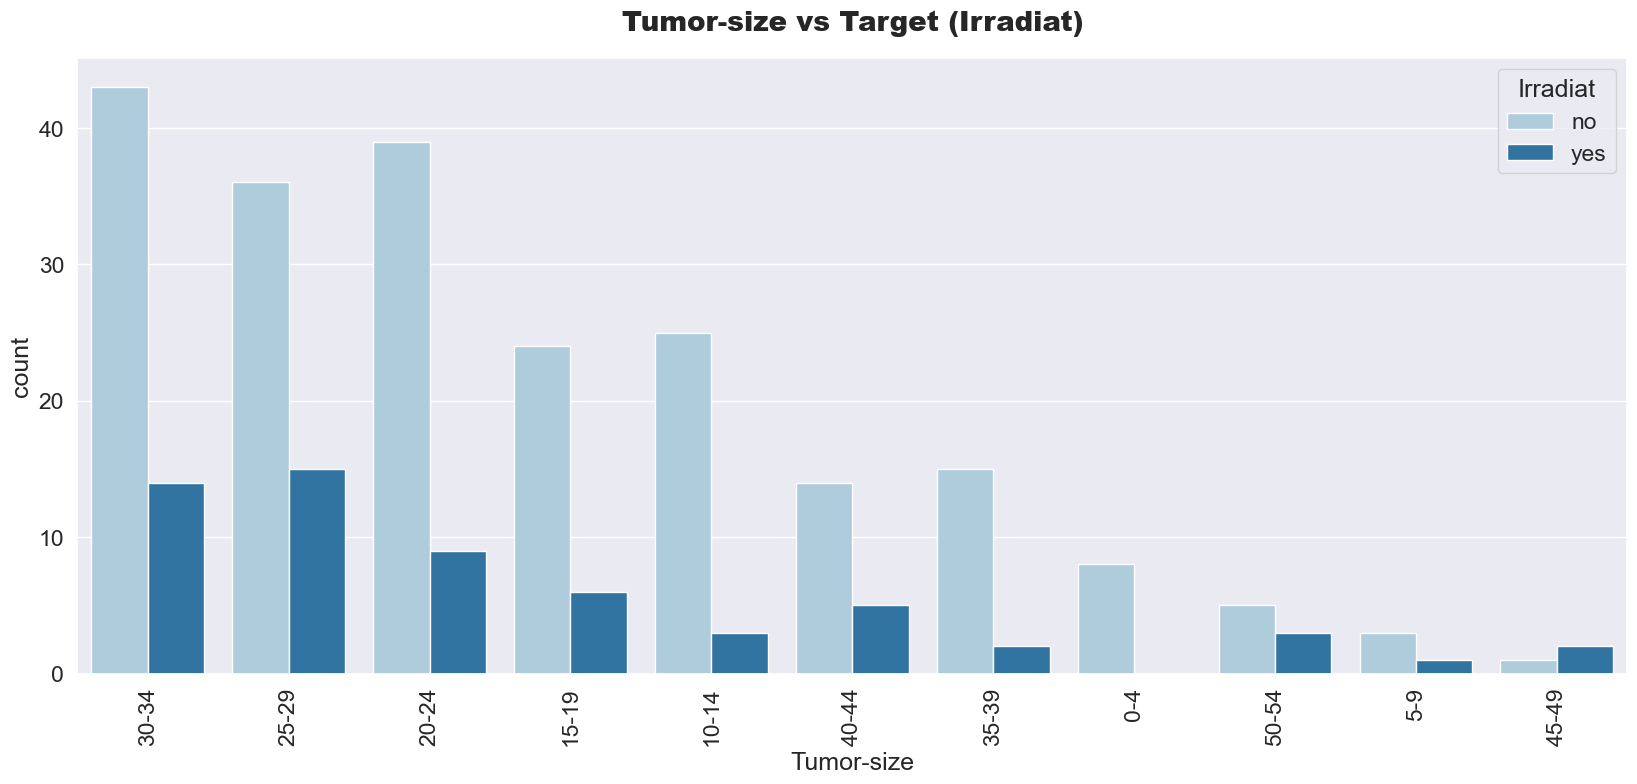

In [249]:
sns.countplot(x='Tumor-size', hue='Irradiat', data=df, palette='Paired', order=df['Tumor-size'].value_counts().index)
plt.title('Tumor-size vs Target (Irradiat)', fontweight='black', pad=20, fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [250]:
inv = df["Inv-nodes"].value_counts().reset_index()
inv

,index,Inv-nodes
0,0-2,209
1,3-5,32
2,6-8,15
3,9-11,7
4,15-17,6
5,12-14,3
6,24-26,1


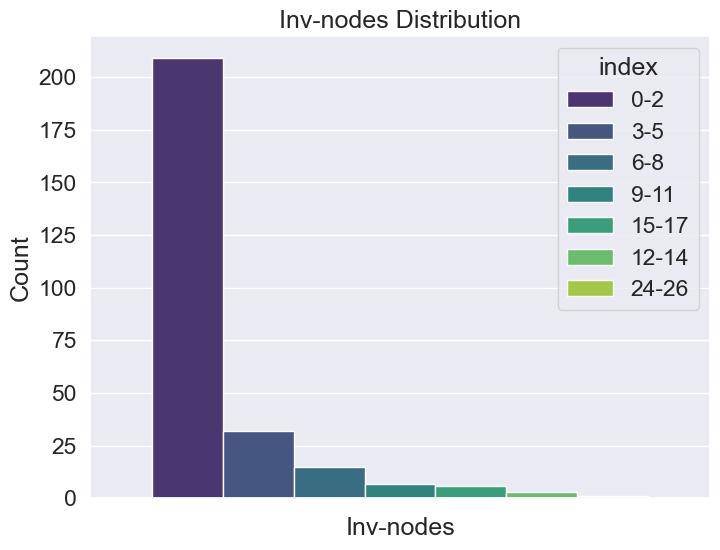

In [251]:
plt.figure(figsize=(8, 6))
sns.barplot(hue='index', y='Inv-nodes', data=inv, palette='viridis', legend = True)
plt.xlabel('Inv-nodes')
plt.ylabel('Count')
plt.title('Inv-nodes Distribution')
plt.show()

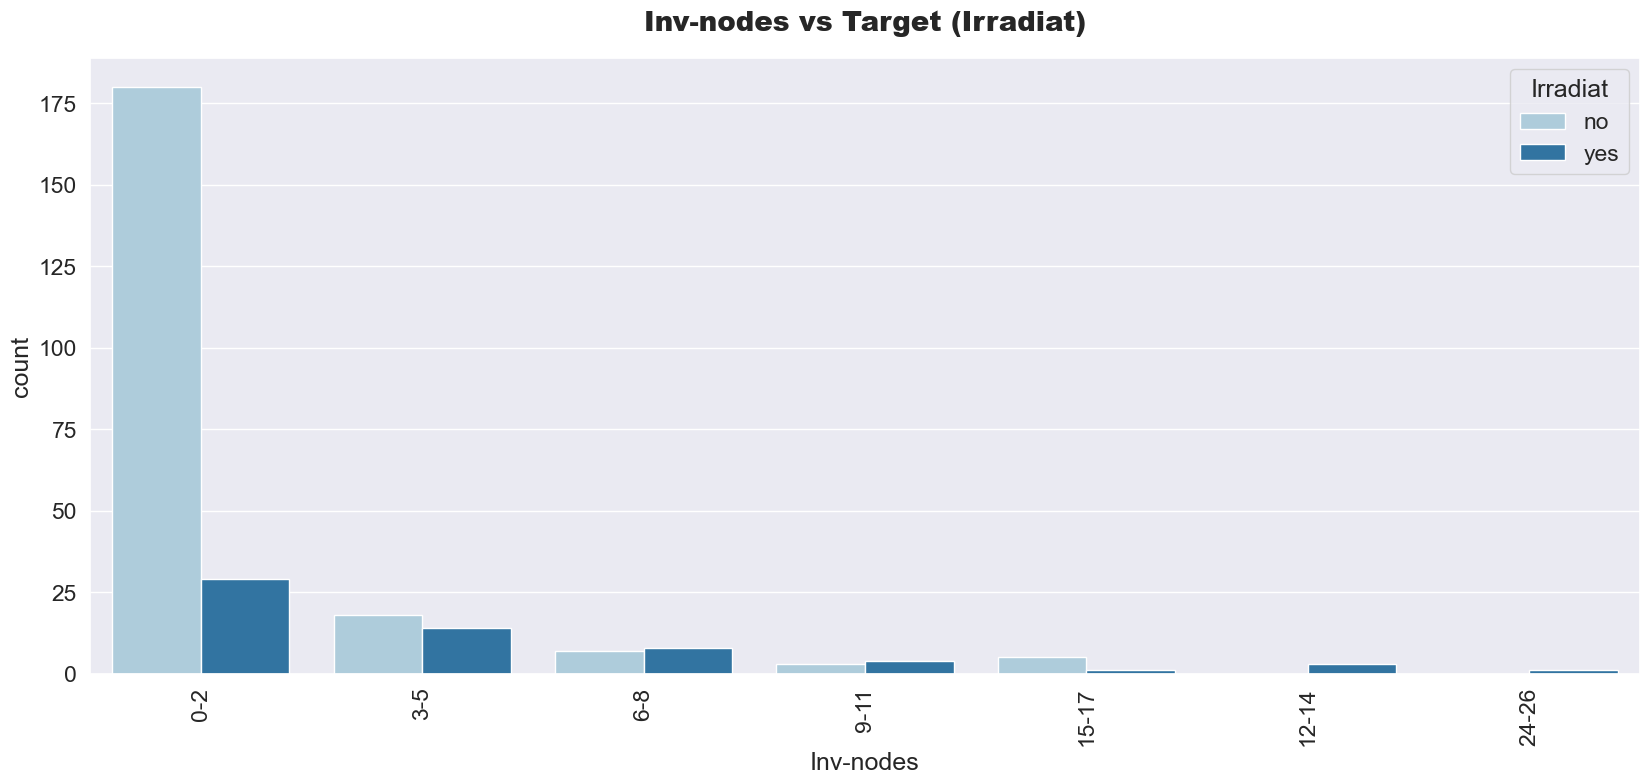

In [252]:
sns.countplot(x='Inv-nodes', hue='Irradiat', data=df, palette='Paired', order=df['Inv-nodes'].value_counts().index)
plt.title('Inv-nodes vs Target (Irradiat)', fontweight='black', pad=20, fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [253]:
node = df["Node-caps"].value_counts().reset_index()
node

,index,Node-caps
0,no,217
1,yes,51
2,?,5


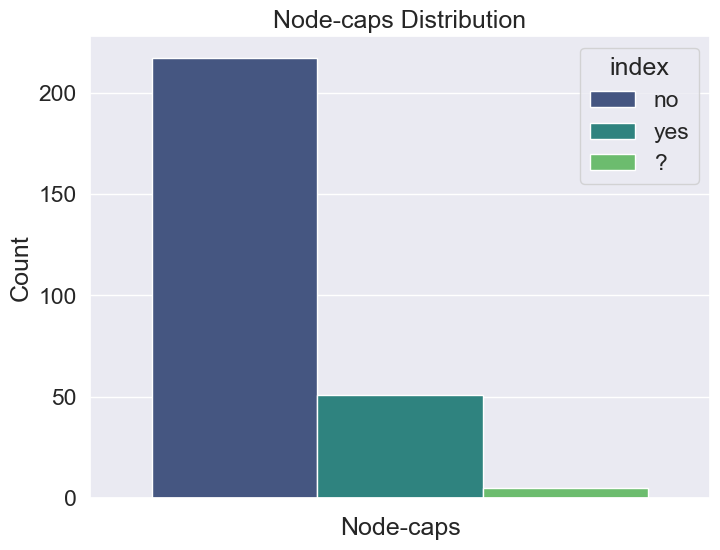

In [254]:
plt.figure(figsize=(8, 6))
sns.barplot(hue='index', y='Node-caps', data=node, palette='viridis', legend = True)
plt.xlabel('Node-caps')
plt.ylabel('Count')
plt.title('Node-caps Distribution')
plt.show()

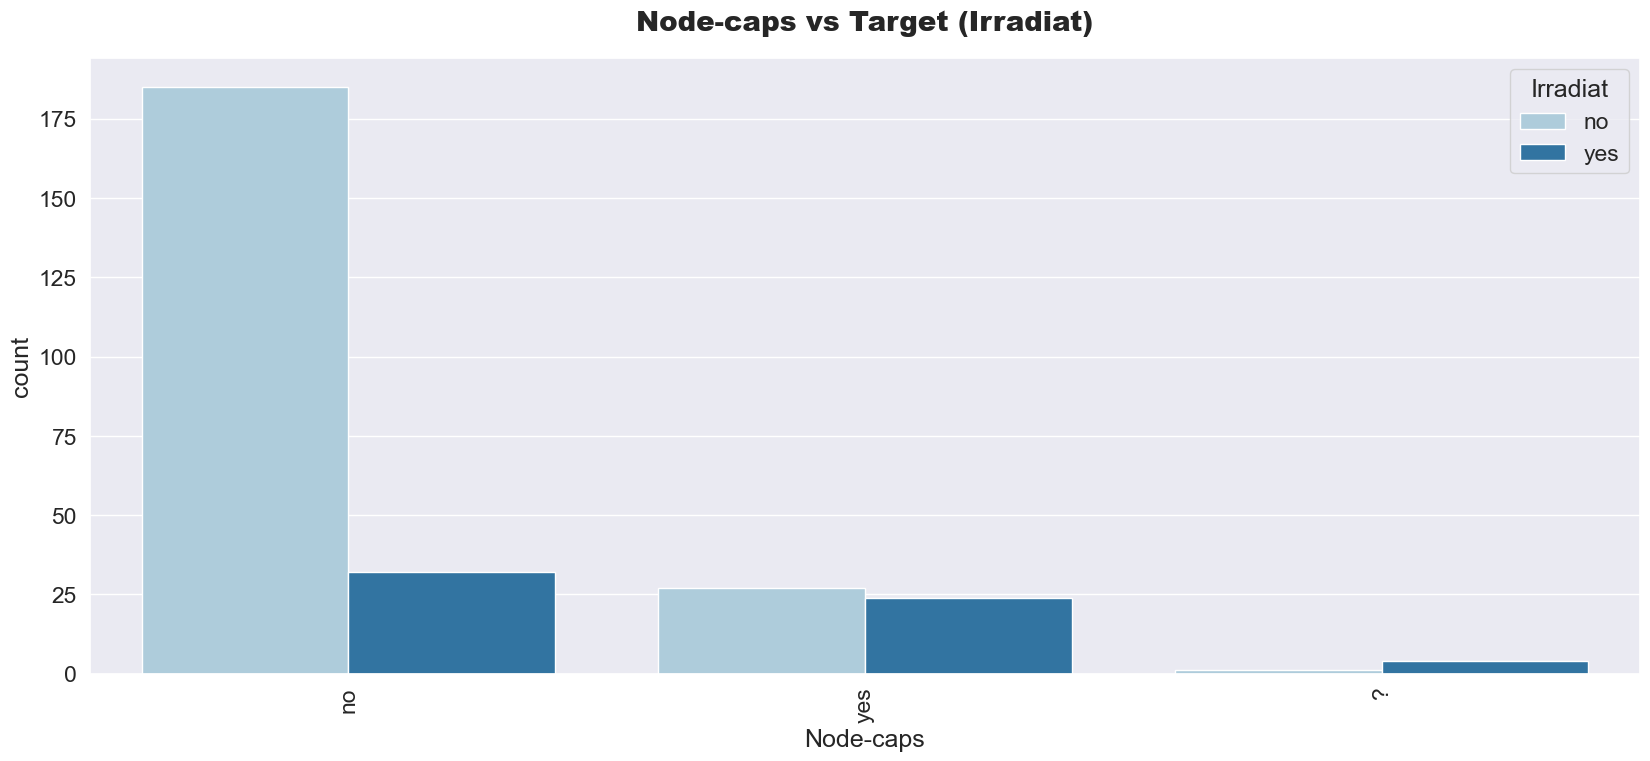

In [255]:
sns.countplot(x='Node-caps', hue='Irradiat', data=df, palette='Paired', order=df['Node-caps'].value_counts().index)
plt.title('Node-caps vs Target (Irradiat)', fontweight='black', pad=20, fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [256]:
deg_malig = df["Deg-malig"].value_counts().reset_index()
deg_malig

,index,Deg-malig
0,2,123
1,3,81
2,1,69


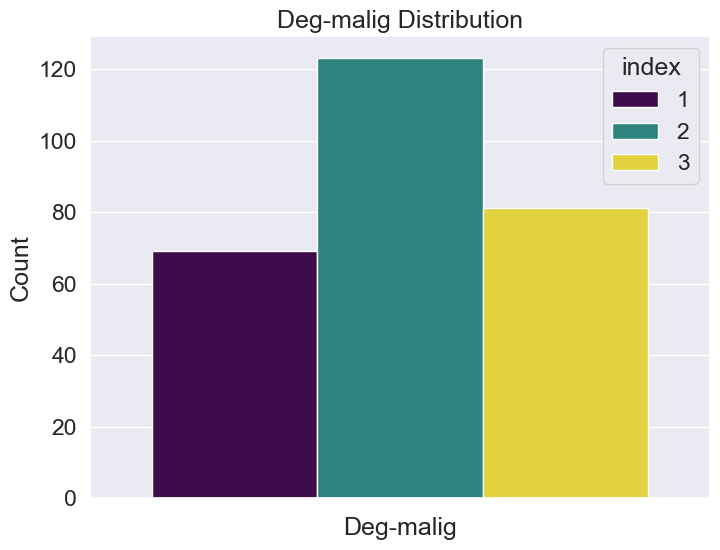

In [257]:
plt.figure(figsize=(8, 6))
sns.barplot(hue='index', y='Deg-malig', data=deg_malig, palette='viridis', legend = True)
plt.xlabel('Deg-malig')
plt.ylabel('Count')
plt.title('Deg-malig Distribution')
plt.show()

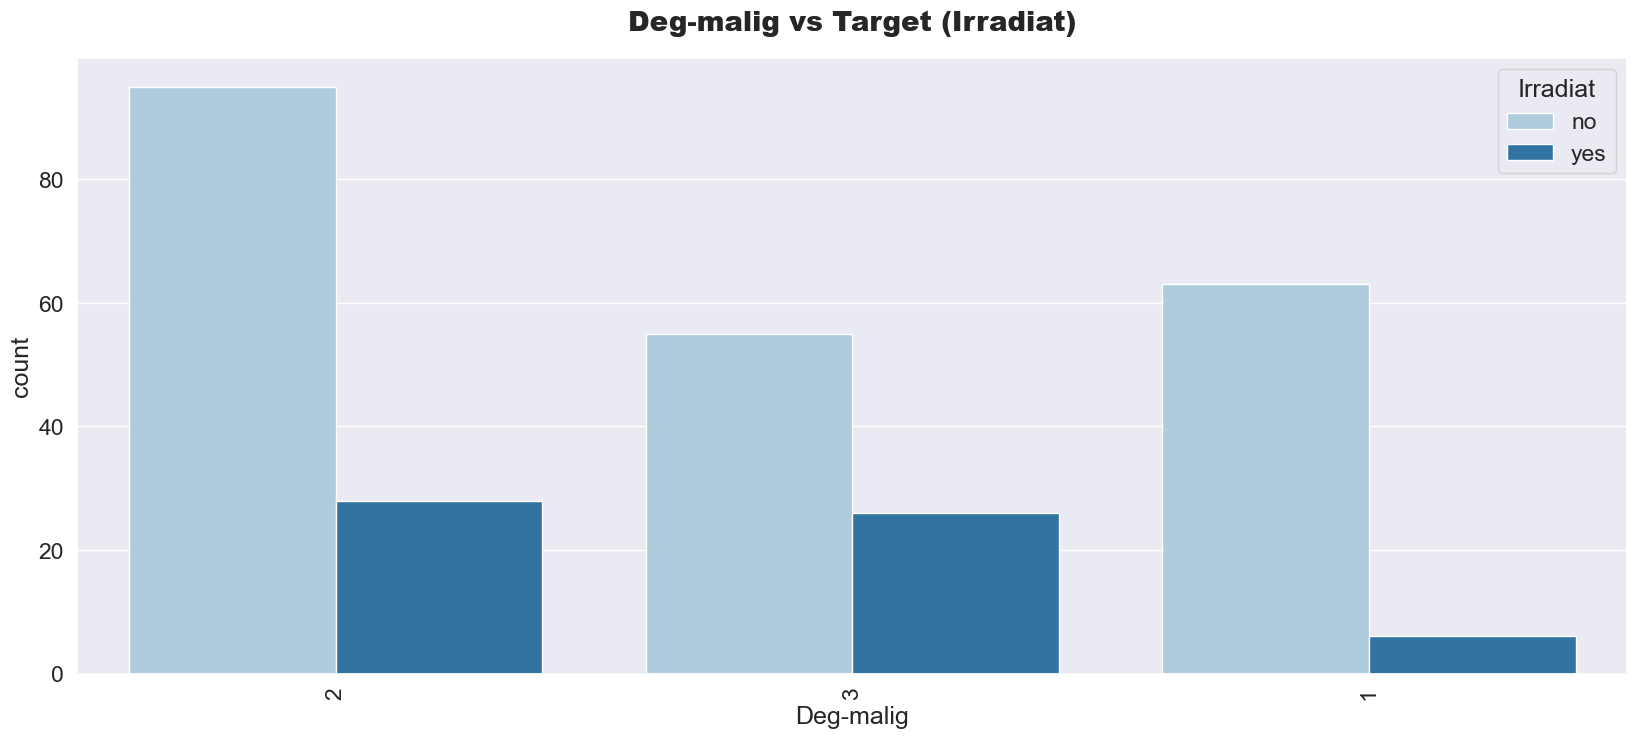

In [258]:
sns.countplot(x='Deg-malig', hue='Irradiat', data=df, palette='Paired', order=df['Deg-malig'].value_counts().index)
plt.title('Deg-malig vs Target (Irradiat)', fontweight='black', pad=20, fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [259]:
breast = df["Breast"].value_counts().reset_index()
breast

,index,Breast
0,left,146
1,right,127


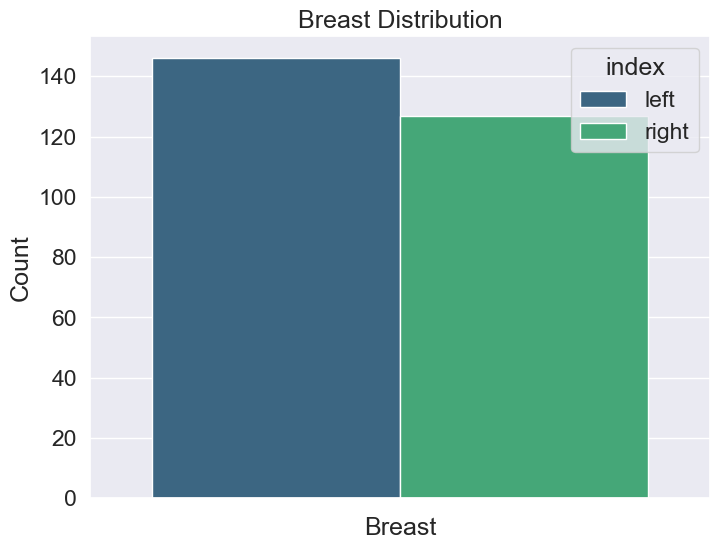

In [260]:
plt.figure(figsize=(8, 6))
sns.barplot(hue='index', y='Breast', data=breast, palette='viridis', legend = True)
plt.xlabel('Breast')
plt.ylabel('Count')
plt.title('Breast Distribution')
plt.show()

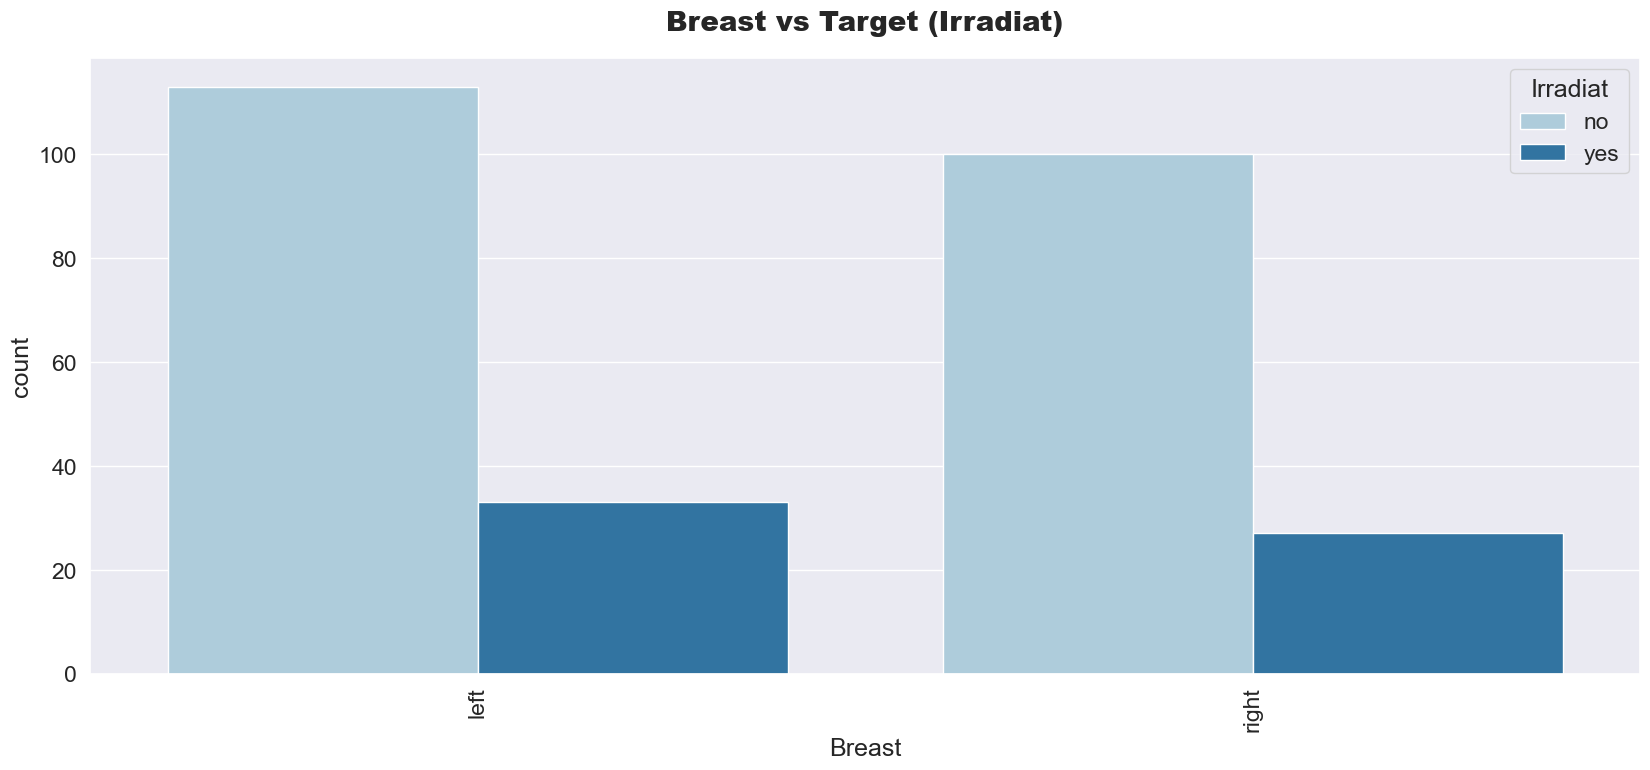

In [261]:
sns.countplot(x='Breast', hue='Irradiat', data=df, palette='Paired', order=df['Breast'].value_counts().index)
plt.title('Breast vs Target (Irradiat)', fontweight='black', pad=20, fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [262]:
breast_quad = df["Breast-quad"].value_counts().reset_index()
breast_quad

,index,Breast-quad
0,left_low,109
1,left_up,89
2,right_up,30
3,right_low,24
4,central,20
5,?,1


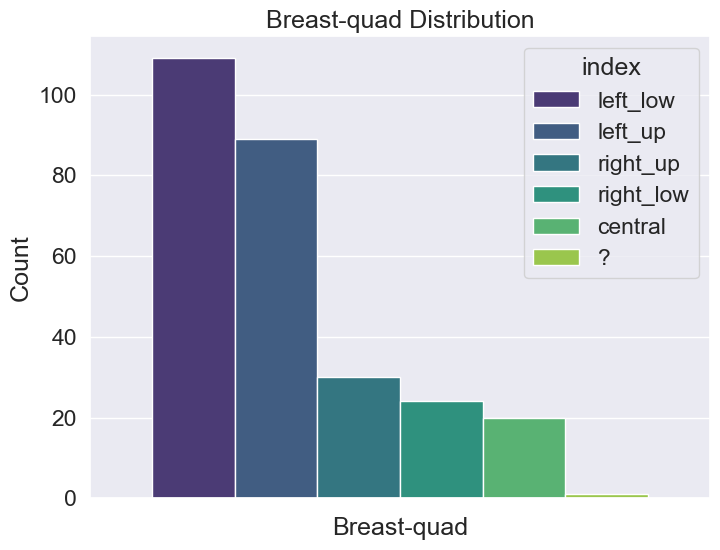

In [263]:
plt.figure(figsize=(8, 6))
sns.barplot(hue='index', y='Breast-quad', data=breast_quad, palette='viridis', legend = True)
plt.xlabel('Breast-quad')
plt.ylabel('Count')
plt.title('Breast-quad Distribution')
plt.show()

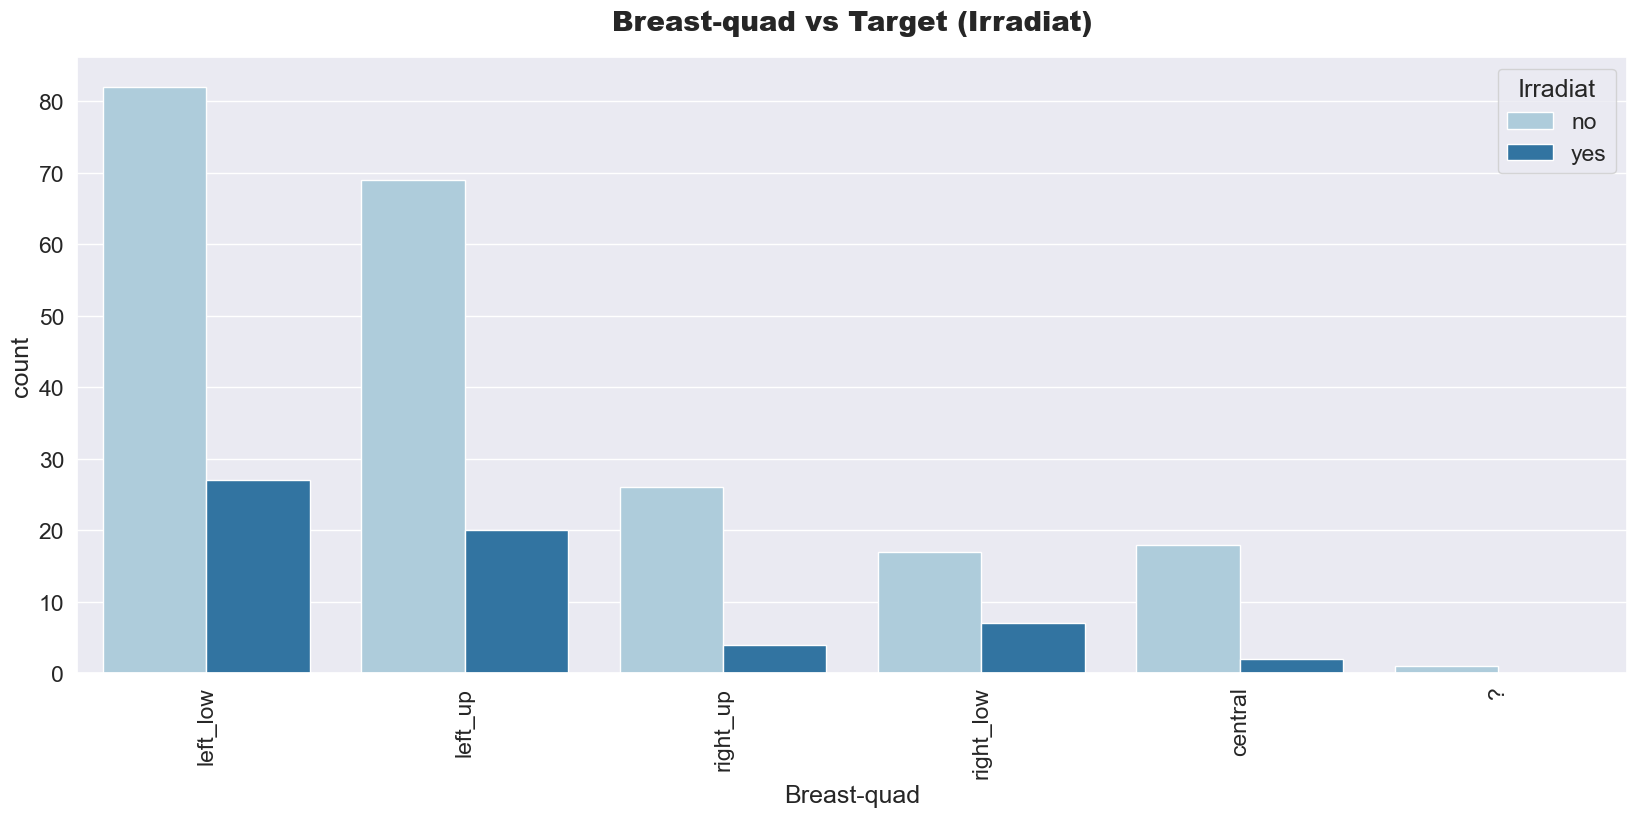

In [264]:
sns.countplot(x='Breast-quad', hue='Irradiat', data=df, palette='Paired', order=df['Breast-quad'].value_counts().index)
plt.title('Breast-quad vs Target (Irradiat)', fontweight='black', pad=20, fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [265]:
irradiat = df["Irradiat"].value_counts().reset_index()
irradiat

,index,Irradiat
0,no,213
1,yes,60


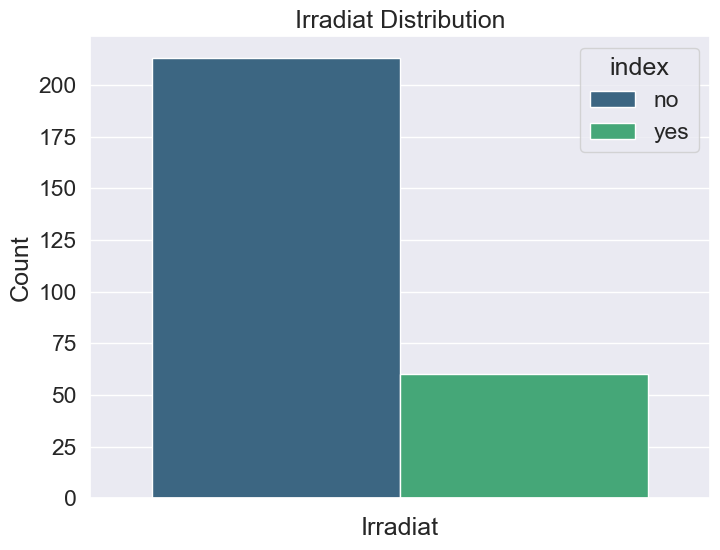

In [266]:
plt.figure(figsize=(8, 6))
sns.barplot(hue='index', y='Irradiat', data=irradiat, palette='viridis', legend = True)
plt.xlabel('Irradiat')
plt.ylabel('Count')
plt.title('Irradiat Distribution')
plt.show()

# Replacing ? of the node-caps feature

In [268]:
df["Node-caps"].value_counts().reset_index()

,index,Node-caps
0,no,217
1,yes,51
2,?,5


In [269]:
df_cap_not_ques = df[~(df["Node-caps"]=='?')]
print(df_cap_not_ques.shape)

(268, 10)


In [270]:
df_cap_ques = df[(df["Node-caps"]=='?')]
print(df_cap_ques.shape)
df_cap_ques.head()

(5, 10)


,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
135,no-recurrence-events,40-49,premeno,25-29,0-2,?,2,left,right_low,yes
153,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_low,yes
172,no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_low,yes
221,recurrence-events,70-79,ge40,15-19,9-11,?,1,left,left_low,yes
251,recurrence-events,50-59,lt40,20-24,0-2,?,1,left,left_low,no


In [271]:
df_cap_0_2 = df[(df["Inv-nodes"]=='0-2')]
print(df_cap_0_2.shape)
df_cap_0_2["Node-caps"].value_counts().reset_index()

(209, 10)


,index,Node-caps
0,no,199
1,yes,8
2,?,2


In [272]:
df_cap_0_2_ques = df_cap_0_2[(df_cap_0_2["Node-caps"]=='?')]
print(df_cap_0_2_ques.shape)
df_cap_0_2_ques.loc[df_cap_0_2_ques.index,"Node-caps"] = "no"
print(df_cap_0_2_ques.shape)

(2, 10)
(2, 10)


In [273]:
df_cap_3_5 = df[(df["Inv-nodes"]=='3-5')]
print(df_cap_3_5.shape)
df_cap_3_5["Node-caps"].value_counts().reset_index()

(32, 10)


,index,Node-caps
0,yes,18
1,no,13
2,?,1


In [274]:
df_cap_3_5_ques = df_cap_3_5[(df_cap_3_5["Node-caps"]=='?')]
print(df_cap_3_5_ques.shape)
df_cap_3_5_ques.loc[df_cap_3_5_ques.index,"Node-caps"] = "yes"
print(df_cap_3_5_ques.shape)

(1, 10)
(1, 10)


In [275]:
df_cap_9_11 = df[(df["Inv-nodes"]=='9-11')]
print(df_cap_9_11.shape)
df_cap_9_11["Node-caps"].value_counts().reset_index()

(7, 10)


,index,Node-caps
0,yes,4
1,?,2
2,no,1


In [276]:
df_cap_9_11_ques = df_cap_9_11[(df_cap_9_11["Node-caps"]=='?')]
print(df_cap_9_11_ques.shape)
df_cap_9_11_ques.loc[df_cap_9_11_ques.index,"Node-caps"] = "yes"
print(df_cap_9_11_ques.shape)

(2, 10)
(2, 10)


In [277]:
df1 = pd.concat([df_cap_not_ques,
                 df_cap_0_2_ques,
                 df_cap_3_5_ques,
                 df_cap_9_11_ques], axis = 0)
print(df1.shape)
df1["Node-caps"].value_counts().reset_index()

(273, 10)


,index,Node-caps
0,no,219
1,yes,54


# Replacing ? of the Breast-quad feature

In [278]:
df_breast_quad_ques = df1[df1["Breast-quad"]=="?"]
df_breast_quad_ques

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
194,recurrence-events,50-59,ge40,30-34,0-2,no,3,left,?,no


In [279]:
df_breast_quad_not_ques = df1[~(df1["Breast-quad"]=="?")]
df_breast_quad_not_ques

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
7,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
8,no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no


In [280]:
df_breast_quad_not_ques["breast_feature"] = df_breast_quad_not_ques["Breast-quad"].str.split("_").str[0]
df_breast_quad_not_ques

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat,breast_feature
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no,left
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no,right
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no,left
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no,left
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no,right
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no,left
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no,left
7,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no,left
8,no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no,left
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no,left


In [281]:
df_breast_quad_not_ques["check"] = df_breast_quad_not_ques["breast_feature"] == df_breast_quad_not_ques["Breast"]
df_breast_quad_not_ques[df_breast_quad_not_ques["check"] == False]

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat,breast_feature,check
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no,left,False
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no,left,False
10,no-recurrence-events,40-49,premeno,0-4,0-2,no,3,left,central,no,central,False
12,no-recurrence-events,60-69,lt40,10-14,0-2,no,1,left,right_up,no,right,False
13,no-recurrence-events,50-59,ge40,25-29,0-2,no,3,left,right_up,no,right,False
22,no-recurrence-events,30-39,premeno,25-29,0-2,no,2,right,left_low,no,left,False
24,no-recurrence-events,50-59,premeno,35-39,0-2,no,2,right,left_up,no,left,False
27,no-recurrence-events,60-69,ge40,25-29,0-2,no,3,right,left_up,no,left,False
28,no-recurrence-events,40-49,premeno,40-44,0-2,no,2,right,left_low,no,left,False
30,no-recurrence-events,50-59,ge40,40-44,0-2,no,3,right,left_up,no,left,False


In [282]:
df_breast_quad_ques.loc[df_breast_quad_ques.index,"Breast-quad"] = "left_up"
df2 = pd.concat([df_breast_quad_ques,
                 df_breast_quad_not_ques
                 ], axis = 0)

print(df2.shape)
df2["Breast-quad"].value_counts().reset_index()

(273, 12)


,index,Breast-quad
0,left_low,109
1,left_up,90
2,right_up,30
3,right_low,24
4,central,20


In [283]:
df2.head()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat,breast_feature,check
194,recurrence-events,50-59,ge40,30-34,0-2,no,3,left,left_up,no,NaN,NaN
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no,left,True
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no,right,True
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no,left,True
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no,left,False


In [284]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        273 non-null    object
 1   Age          273 non-null    object
 2   Menopause    273 non-null    object
 3   Tumor-size   273 non-null    object
 4   Inv-nodes    273 non-null    object
 5   Node-caps    273 non-null    object
 6   Deg-malig    273 non-null    int64 
 7   Breast       273 non-null    object
 8   Breast-quad  273 non-null    object
 9   Irradiat     273 non-null    object
dtypes: int64(1), object(9)
memory usage: 21.5+ KB


In [286]:
df2["Node-caps"].unique()

array(['no', 'yes'], dtype=object)

In [287]:
df2["Breast-quad"].unique()

array(['left_up', 'left_low', 'right_up', 'right_low', 'central'],
      dtype=object)

# Encoding

In [288]:
df2['Irradiat'] = df2['Irradiat'].map({'no':0, 'yes':1})
df2.head()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat,breast_feature,check
194,recurrence-events,50-59,ge40,30-34,0-2,no,3,left,left_up,0,NaN,NaN
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,0,left,True
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,0,right,True
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,0,left,True
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,0,left,False


In [289]:
df2 = df2.drop(["breast_feature","check"], axis = 1)
df2.head()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
194,recurrence-events,50-59,ge40,30-34,0-2,no,3,left,left_up,0
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,0
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,0
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,0
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,0


In [290]:
age_category_map = {"0-9": 0,"10-19": 1, "20-29": 2, "30-39": 3, "40-49": 4, 
                    "50-59": 5, "60-69": 6, "70-79": 7, "80-89": 8, "90-99": 9}

df2['age_category'] = df2['Age'].map(age_category_map)
df2 = df2.drop(["Age"], axis = 1)
df2.head()

,Class,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat,age_category
194,recurrence-events,ge40,30-34,0-2,no,3,left,left_up,0,5
0,no-recurrence-events,premeno,30-34,0-2,no,3,left,left_low,0,3
1,no-recurrence-events,premeno,20-24,0-2,no,2,right,right_up,0,4
2,no-recurrence-events,premeno,20-24,0-2,no,2,left,left_low,0,4
3,no-recurrence-events,ge40,15-19,0-2,no,2,right,left_up,0,6


In [291]:
df2["age_category"].unique()

array([5, 3, 4, 6, 7, 2], dtype=int64)

In [292]:
df2["Tumor-size"].unique()

array(['30-34', '20-24', '15-19', '0-4', '25-29', '50-54', '10-14',
       '40-44', '35-39', '5-9', '45-49'], dtype=object)

In [293]:
df2["Inv-nodes"].unique()

array(['0-2', '6-8', '3-5', '15-17', '12-14', '9-11', '24-26'],
      dtype=object)

In [294]:
tumor_Size_category_map = {"0-4": 0,"5-9": 1, "10-14": 2, "15-19": 3, "20-24": 4, 
                    "25-29": 5, "30-34": 6, "35-39": 7, "40-44": 8, "45-49": 9,
                    "50-54": 10, "55-59": 11, "60-64": 12}

df2['tumor_size_category'] = df2['Tumor-size'].map(tumor_Size_category_map)
df2 = df2.drop(["Tumor-size"], axis = 1)
df2.head()

,Class,Menopause,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat,age_category,tumor_size_category
194,recurrence-events,ge40,0-2,no,3,left,left_up,0,5,6
0,no-recurrence-events,premeno,0-2,no,3,left,left_low,0,3,6
1,no-recurrence-events,premeno,0-2,no,2,right,right_up,0,4,4
2,no-recurrence-events,premeno,0-2,no,2,left,left_low,0,4,4
3,no-recurrence-events,ge40,0-2,no,2,right,left_up,0,6,3


In [295]:
inv_nodes_category_map = {"0-2": 0,"3-5": 1, "6-8": 2, "9-11": 3, "12-14": 4, 
                    "15-17": 5, "18-20": 6, "21-23": 7, "24-26": 8, "27-29": 9,
                    "30-32": 10, "33-35": 11, "36-38": 12}

df2['inv_nodes_category'] = df2['Inv-nodes'].map(inv_nodes_category_map)
df2 = df2.drop(['Inv-nodes'], axis = 1)
df2.head()

,Class,Menopause,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat,age_category,tumor_size_category,inv_nodes_category
194,recurrence-events,ge40,no,3,left,left_up,0,5,6,0
0,no-recurrence-events,premeno,no,3,left,left_low,0,3,6,0
1,no-recurrence-events,premeno,no,2,right,right_up,0,4,4,0
2,no-recurrence-events,premeno,no,2,left,left_low,0,4,4,0
3,no-recurrence-events,ge40,no,2,right,left_up,0,6,3,0


In [296]:
df2["Class"].unique()

array(['recurrence-events', 'no-recurrence-events'], dtype=object)

In [297]:
class_category_map = {"recurrence-events": 0,"no-recurrence-events": 1}

df2['class_category'] = df2['Class'].map(class_category_map)
df2 = df2.drop(['Class'], axis = 1)
df2.head()

,Menopause,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat,age_category,tumor_size_category,inv_nodes_category,class_category
194,ge40,no,3,left,left_up,0,5,6,0,0
0,premeno,no,3,left,left_low,0,3,6,0,1
1,premeno,no,2,right,right_up,0,4,4,0,1
2,premeno,no,2,left,left_low,0,4,4,0,1
3,ge40,no,2,right,left_up,0,6,3,0,1


In [298]:
df2["Menopause"].unique()

array(['ge40', 'premeno', 'lt40'], dtype=object)

In [299]:
menopause_category_map = {"ge40": 0,"premeno": 1, "lt40":2}

df2['menopause_category'] = df2['Menopause'].map(menopause_category_map)
df2 = df2.drop(['Menopause'], axis = 1)
df2.head()

,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat,age_category,tumor_size_category,inv_nodes_category,class_category,menopause_category
194,no,3,left,left_up,0,5,6,0,0,0
0,no,3,left,left_low,0,3,6,0,1,1
1,no,2,right,right_up,0,4,4,0,1,1
2,no,2,left,left_low,0,4,4,0,1,1
3,no,2,right,left_up,0,6,3,0,1,0


In [300]:
df2["Node-caps"].unique()

array(['no', 'yes'], dtype=object)

In [301]:
node_caps_category_map = {"no": 0,"yes": 1}

df2['node_caps_category'] = df2['Node-caps'].map(node_caps_category_map)
df2 = df2.drop(['Node-caps'], axis = 1)
df2.head()

,Deg-malig,Breast,Breast-quad,Irradiat,age_category,tumor_size_category,inv_nodes_category,class_category,menopause_category,node_caps_category
194,3,left,left_up,0,5,6,0,0,0,0
0,3,left,left_low,0,3,6,0,1,1,0
1,2,right,right_up,0,4,4,0,1,1,0
2,2,left,left_low,0,4,4,0,1,1,0
3,2,right,left_up,0,6,3,0,1,0,0


In [302]:
df2["node_caps_category"].unique()

array([0, 1], dtype=int64)

In [303]:
df2["Breast"].unique()

array(['left', 'right'], dtype=object)

In [304]:
breast_category_map = {"left": 0,"right": 1}

df2['breast_category_map'] = df2['Breast'].map(breast_category_map)
df2 = df2.drop(['Breast'], axis = 1)
df2.head()

,Deg-malig,Breast-quad,Irradiat,age_category,tumor_size_category,inv_nodes_category,class_category,menopause_category,node_caps_category,breast_category_map
194,3,left_up,0,5,6,0,0,0,0,0
0,3,left_low,0,3,6,0,1,1,0,0
1,2,right_up,0,4,4,0,1,1,0,1
2,2,left_low,0,4,4,0,1,1,0,0
3,2,left_up,0,6,3,0,1,0,0,1


In [305]:
df2["Breast-quad"].unique()

array(['left_up', 'left_low', 'right_up', 'right_low', 'central'],
      dtype=object)

In [306]:
breast_quad_category_map = {"left_up": 0,"left_low": 1, "right_up" : 2, "right_low":3, "central":4}

df2['breast_quad_category'] = df2['Breast-quad'].map(breast_quad_category_map)
df2 = df2.drop(['Breast-quad'], axis = 1)
df2.head()

,Deg-malig,Irradiat,age_category,tumor_size_category,inv_nodes_category,class_category,menopause_category,node_caps_category,breast_category_map,breast_quad_category
194,3,0,5,6,0,0,0,0,0,0
0,3,0,3,6,0,1,1,0,0,1
1,2,0,4,4,0,1,1,0,1,2
2,2,0,4,4,0,1,1,0,0,1
3,2,0,6,3,0,1,0,0,1,0


In [307]:
df2 = df2.sample(frac=1)
df2.head()

,Deg-malig,Irradiat,age_category,tumor_size_category,inv_nodes_category,class_category,menopause_category,node_caps_category,breast_category_map,breast_quad_category
241,3,0,6,10,0,0,0,0,1,0
64,1,0,4,5,0,1,1,0,0,3
215,3,1,5,6,0,0,1,0,1,0
49,1,0,4,4,0,1,1,0,1,1
46,2,0,4,5,0,1,1,0,1,1


In [308]:
X = df2.drop(['Irradiat'],axis=1)
y = df2['Irradiat']

In [309]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print(len(X_res),len(y_res))
y_res.value_counts()

426 426


0    213
1    213
Name: Irradiat, dtype: int64

In [310]:
X_train,X_val,y_train,y_val = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [311]:
print('X_train shape -->', X_train.shape)
print('X_val shape -->', X_val.shape)
print('y_train shape -->', y_train.shape)
print('y_val shape -->', y_val.shape)

X_train shape --> (298, 9)
X_val shape --> (128, 9)
y_train shape --> (298,)
y_val shape --> (128,)


# Model building - Logistic Regression

In [312]:
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(X_train, y_train)
y_pred_lr = Logistic_Regression.predict(X_val)

lr_AUROC = roc_auc_score(y_val, y_pred_lr)*100
lr_Acu = accuracy_score(y_val, y_pred_lr)*100
lr_f1 = f1_score(y_val, y_pred_lr)



print( "AUROC OF Sampled Logistic Regression : ", roc_auc_score(y_val, Logistic_Regression.predict_proba(X_val)[:,1])*100)
print("F1 SCORE OF Logistic Regression : ", lr_f1 )
print("Accuracy OF Logistic Regression : ", lr_Acu)
print("AUROC OF Logistic Regression : ", lr_AUROC)

AUROC OF Sampled Logistic Regression :  73.73046875
F1 SCORE OF Logistic Regression :  0.6507936507936509
Accuracy OF Logistic Regression :  65.625
AUROC OF Logistic Regression :  65.625


In [313]:
cmL = confusion_matrix(y_val, y_pred_lr)
cmL

array([[43, 21],
       [23, 41]], dtype=int64)

# Decision Tree

In [314]:
for depth in [1,2,3,4,5,6,7,8,9,10]:
    Decision_Tree = DecisionTreeClassifier(max_depth=depth)
    Decision_Tree.fit(X_train, y_train)
    valAccuracy = cross_val_score(Decision_Tree, X_val, y_val, cv=10)
    print("Depth  : ", depth,"---------", " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1 ---------  Cross val score :  0.7269230769230769
Depth  :  2 ---------  Cross val score :  0.7506410256410257
Depth  :  3 ---------  Cross val score :  0.7506410256410257
Depth  :  4 ---------  Cross val score :  0.7333333333333333
Depth  :  5 ---------  Cross val score :  0.6884615384615385
Depth  :  6 ---------  Cross val score :  0.7192307692307692
Depth  :  7 ---------  Cross val score :  0.7032051282051283
Depth  :  8 ---------  Cross val score :  0.6711538461538462
Depth  :  9 ---------  Cross val score :  0.6865384615384615
Depth  :  10 ---------  Cross val score :  0.6942307692307692


In [315]:
Decision_Tree = DecisionTreeClassifier(max_depth=4)
Decision_Tree.fit(X_train, y_train)
y_pred_dt = Decision_Tree.predict(X_val)

dt_AUROC = roc_auc_score(y_val, y_pred_dt)*100
dt_Acu = accuracy_score(y_val, y_pred_dt)*100
dt_f1 = f1_score(y_val, y_pred_dt)

print( "AUROC OF Sampled Decision_Tree  : ", roc_auc_score(y_val, Decision_Tree.predict_proba(X_val)[:,1])*100)
print("F1 SCORE OF Decision_Tree : ", dt_f1 )
print("Accuracy OF Decision_Tree : ", dt_Acu )
print("AUROC OF Decision_Tree : ", dt_AUROC )

AUROC OF Sampled Decision_Tree  :  80.029296875
F1 SCORE OF Decision_Tree :  0.7482993197278912
Accuracy OF Decision_Tree :  71.09375
AUROC OF Decision_Tree :  71.09375


In [316]:
cmD = confusion_matrix(y_val, y_pred_dt)
cmD

array([[36, 28],
       [ 9, 55]], dtype=int64)

# Random Forest

In [317]:
Random_Forest = RandomForestClassifier()
Random_Forest.fit(X_train, y_train)
y_pred_rf = Random_Forest.predict(X_val)

rf_AUROC = roc_auc_score(y_val, y_pred_rf)*100
rf_Acu = accuracy_score(y_val, y_pred_rf)*100
rf_f1 = f1_score(y_val, y_pred_rf)


print( "AUROC OF Sampled Random_Forest  : ", roc_auc_score(y_val, Random_Forest.predict_proba(X_val)[:,1])*100)
print("F1 SCORE OF Random_Forest : ", rf_f1 )
print("Accuracy OF Random_Forest : ", rf_Acu)
print("AUROC OF Random_Forest : ", rf_AUROC )

AUROC OF Sampled Random_Forest  :  89.013671875
F1 SCORE OF Random_Forest :  0.8208955223880597
Accuracy OF Random_Forest :  81.25
AUROC OF Random_Forest :  81.25


In [318]:
cmR = confusion_matrix(y_val, y_pred_rf)
cmR

array([[49, 15],
       [ 9, 55]], dtype=int64)

# Gradient Boosting Classifier

In [319]:
Gradient_Boosting = GradientBoostingClassifier()
Gradient_Boosting.fit(X_train, y_train)
y_pred_gb = Gradient_Boosting.predict(X_val)

gb_AUROC = roc_auc_score(y_val, y_pred_gb)*100
gb_Acu = accuracy_score(y_val, y_pred_gb)*100
gb_f1 = f1_score(y_val, y_pred_gb)

print( "AUROC OF Sampled Gradient_Boosting  : ", roc_auc_score(y_val, Gradient_Boosting.predict_proba(X_val)[:,1])*100)
print("F1 SCORE OF Gradient_Boosting : ", gb_f1 )
print("Accuracy OF Gradient_Boosting : ", gb_Acu )
print("AUROC OF Gradient_Boosting : ", gb_AUROC )

AUROC OF Sampled Gradient_Boosting  :  81.103515625
F1 SCORE OF Gradient_Boosting :  0.787878787878788
Accuracy OF Gradient_Boosting :  78.125
AUROC OF Gradient_Boosting :  78.125


In [320]:
cmG = confusion_matrix(y_val, y_pred_gb)
cmG

array([[48, 16],
       [12, 52]], dtype=int64)

# XGBoost

In [321]:
XGB_Classifier = XGBClassifier()
XGB_Classifier.fit(X_train, y_train)
y_pred_xgb = XGB_Classifier.predict(X_val)

xgb_AUROC = roc_auc_score(y_val, y_pred_xgb)*100
xgb_Acu = accuracy_score(y_val, y_pred_xgb)*100
xgb_f1 = f1_score(y_val, y_pred_xgb)

print("AUROC OF Sampled XGB_Classifier  : ", roc_auc_score(y_val, XGB_Classifier.predict_proba(X_val)[:,1])*100)
print("F1 SCORE OF XGB_Classifier : ", xgb_f1)
print("Accuracy OF XGB_Classifier : ", xgb_Acu)
print("AUROC OF XGB_Classifier : ", xgb_AUROC)

AUROC OF Sampled XGB_Classifier  :  83.740234375
F1 SCORE OF XGB_Classifier :  0.7633587786259542
Accuracy OF XGB_Classifier :  75.78125
AUROC OF XGB_Classifier :  75.78125


In [322]:
cmX = confusion_matrix(y_val, y_pred_xgb)
cmX

array([[47, 17],
       [14, 50]], dtype=int64)

In [76]:
# param_dist = {
#     'max_depth': [4, 6, 8, ],
#     'eta': [0.01, 0.1, 0.3],
#     'gamma': [ 0.1, 0.2, 0.3 ],
#     'min_child_weight': [2, 3,4],
#     'subsample': [0.5,0.6, 0.7],
#     'colsample_bytree': [0.5, 0.7, 1],
#     "reg_alpha": [0.01, 0.1, 1, 10, 100]}

# grid_search = GridSearchCV(estimator=XGB_Classifier,
#                                scoring='roc_auc',  # Minimize MSE
#                                param_grid = param_dist,
#                                )

# grid_search.fit(X_train, y_train,
#                  eval_set=[(X_train, y_train), (X_val, y_val)],
#                  verbose=1000)


# # Print the best hyperparameters found
# print("Best Hyperparameters:", grid_search.best_params_)

# # Use the best model for prediction
# best_model = grid_search.best_estimator_
# y_pred_xgb = best_model.predict(X_val)

# xgb_AUROC = roc_auc_score(y_val, y_pred_xgb)*100
# xgb_Acu = accuracy_score(y_val, y_pred_xgb)*100
# xgb_f1 = f1_score(y_val, y_pred_xgb)

# print("AUROC OF Sampled XGB_Classifier  : ", roc_auc_score(y_val, XGB_Classifier.predict_proba(X_val)[:,1])*100)
# print("F1 SCORE OF XGB_Classifier : ", xgb_f1)
# print("Accuracy OF XGB_Classifier : ", xgb_Acu)
# print("AUROC OF XGB_Classifier : ", xgb_AUROC)

# Model Comparison

In [323]:
final_data = pd.DataFrame({
    'Models':['Logistic_Regression','Decision_Tree','Random_Forest','Gradient_Boosting','XGB'],
    'Accuracy':[lr_f1,dt_f1,rf_f1,gb_f1,xgb_f1],
    "F1":[lr_Acu,dt_Acu,rf_Acu,gb_Acu,xgb_Acu],
    "AUROC":[lr_AUROC,dt_AUROC,rf_AUROC,gb_AUROC,xgb_AUROC]
})

final_data

,Models,Accuracy,F1,AUROC
0,Logistic_Regression,0.650794,65.62500,65.62500
1,Decision_Tree,0.748299,71.09375,71.09375
2,Random_Forest,0.820896,81.25000,81.25000
3,Gradient_Boosting,0.787879,78.12500,78.12500
4,XGB,0.763359,75.78125,75.78125


# Feature importance 

### random forest

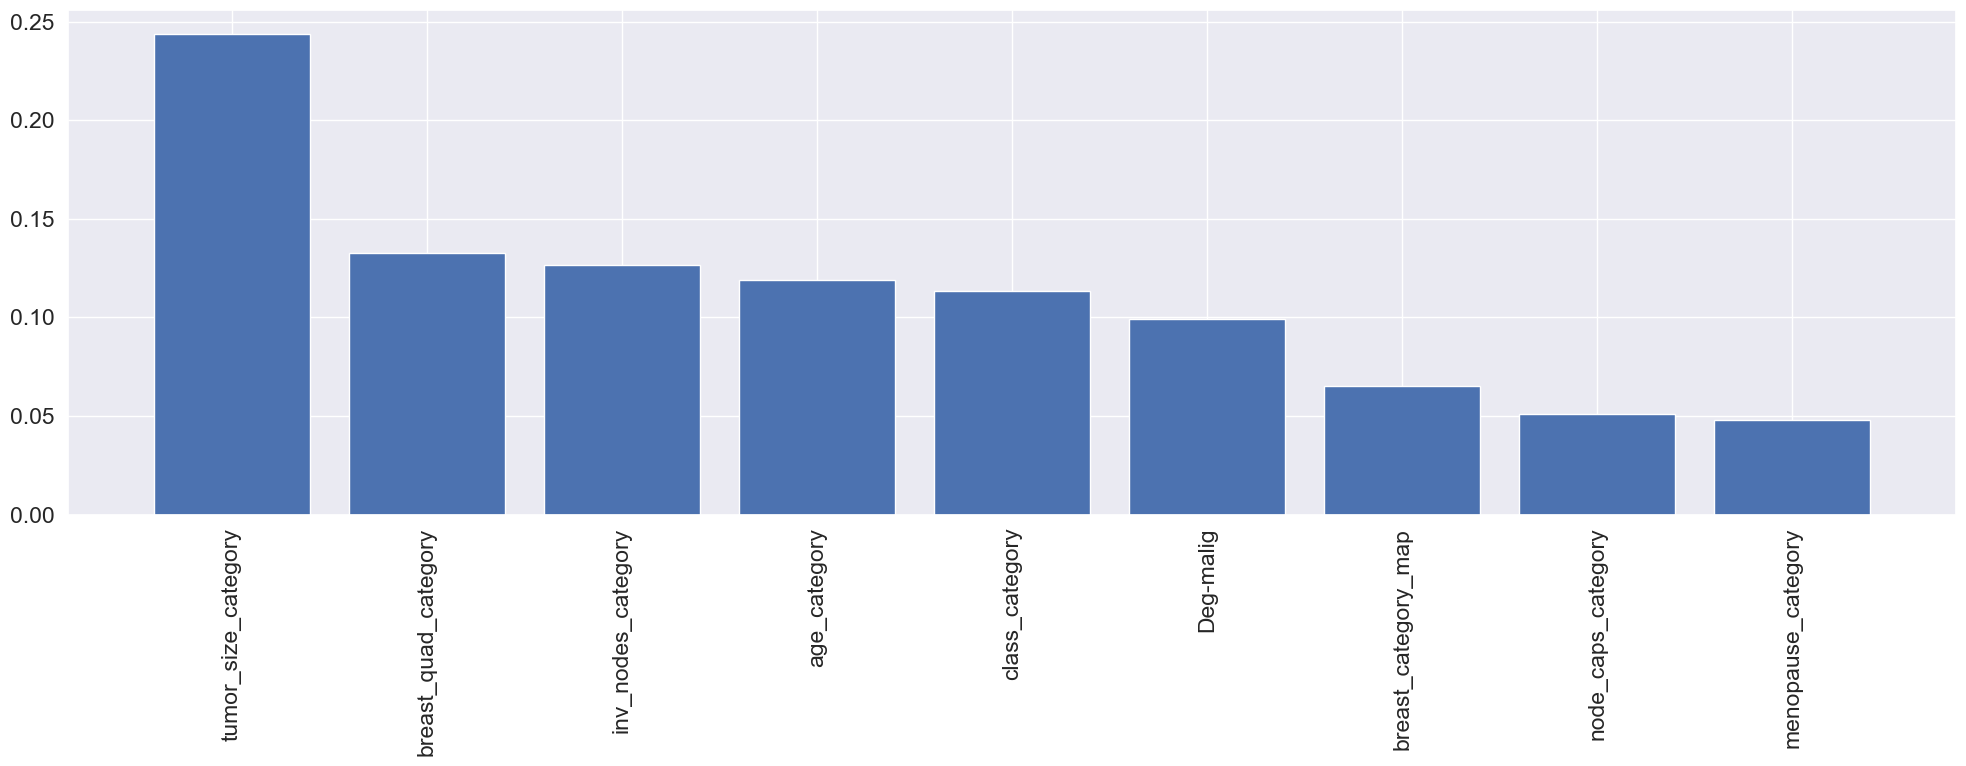

In [324]:
feature_names = X.columns
importances = Random_Forest.feature_importances_

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

plt.bar(sorted_feature_names, sorted_importances)
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### xgboost

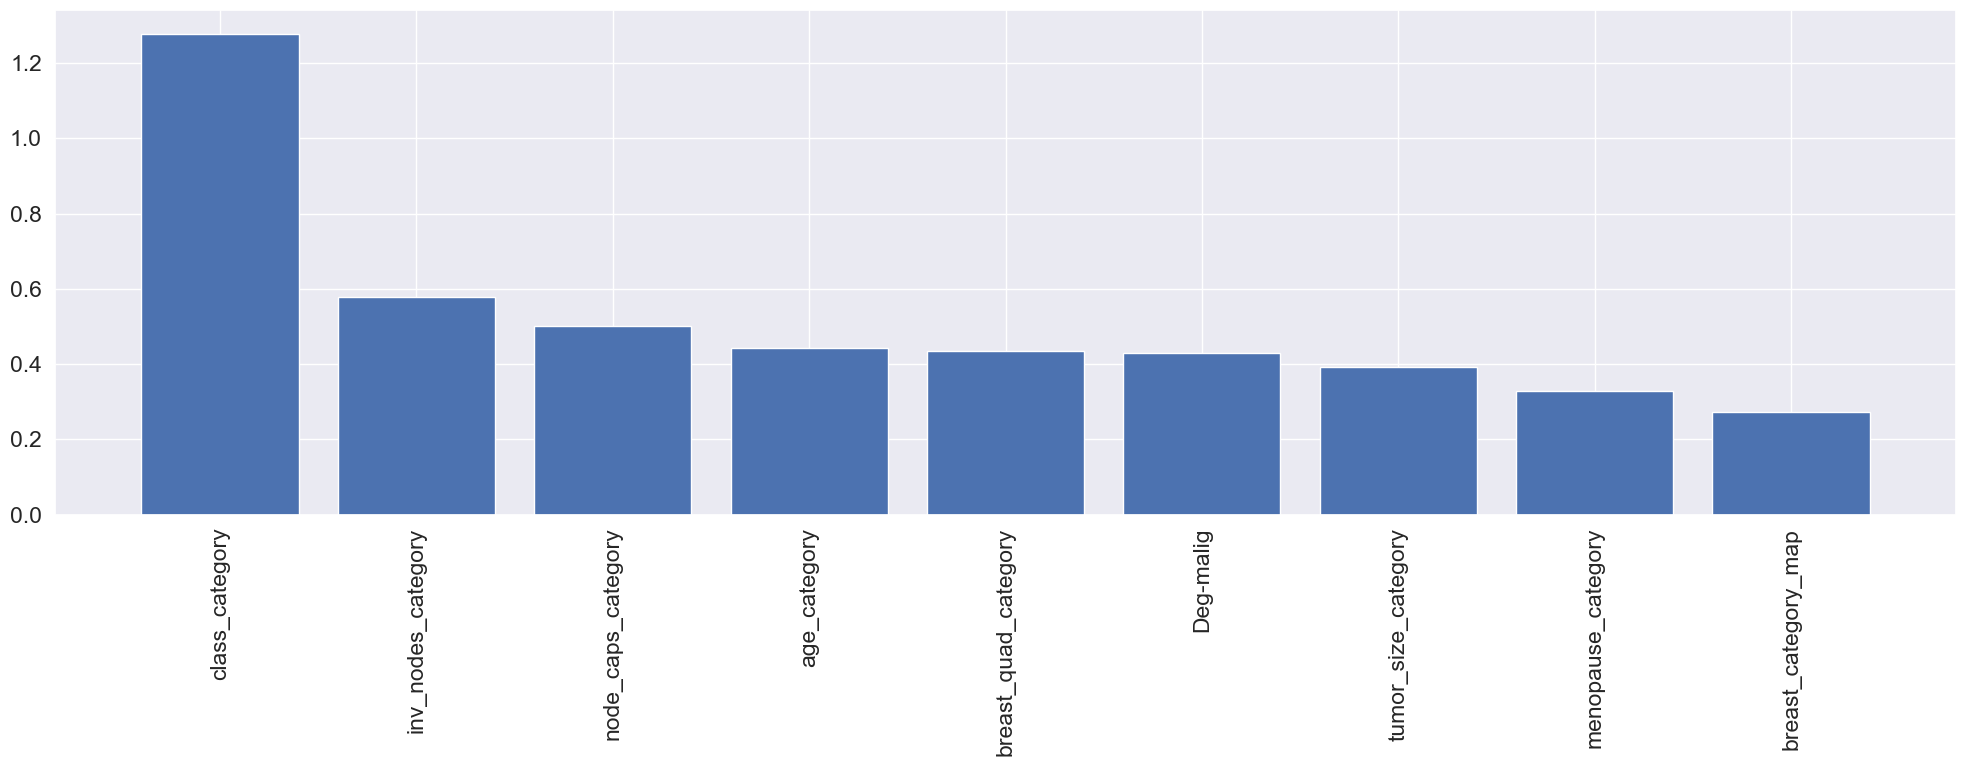

In [325]:
#Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]
f = "gain"
importances = XGB_Classifier.get_booster().get_score(importance_type= f)
keys = list(importances.keys())
values = list(importances.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False).reset_index()
plt.bar(data["index"], data["score"])
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### so the final model is random forest classifier

# Prediction on Test data 

In [379]:
test = pd.read_excel("Test_Breast_Cancer.xlsx")
test = test.drop(["Irradiat"],axis = 1)
test.head()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad
0,no-recurrence-events,30-39,premeno,25-29,6-8,yes,2,right,left_up
1,no-recurrence-events,50-59,premeno,25-29,NaN,yes,2,left,left_up
2,no-recurrence-events,40-49,premeno,35-39,9-11,yes,2,right,left_up
3,no-recurrence-events,40-49,premeno,35-39,9-11,yes,2,right,right_up
4,no-recurrence-events,40-49,premeno,40-44,3-5,yes,3,right,left_up


In [380]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        10 non-null     object
 1   Age          10 non-null     object
 2   Menopause    10 non-null     object
 3   Tumor-size   10 non-null     object
 4   Inv-nodes    8 non-null      object
 5   Node-caps    10 non-null     object
 6   Deg-malig    10 non-null     int64 
 7   Breast       10 non-null     object
 8   Breast-quad  10 non-null     object
dtypes: int64(1), object(8)
memory usage: 852.0+ bytes


In [381]:
test['Age'] = test['Age'].fillna(test['Age'].mode()[0])
age_category_map = {"0-9": 0,"10-19": 1, "20-29": 2, "30-39": 3, "40-49": 4, 
                    "50-59": 5, "60-69": 6, "70-79": 7, "80-89": 8, "90-99": 9}

test['age_category'] = test['Age'].map(age_category_map)
test = test.drop(["Age"], axis = 1)
test.head()

,Class,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,age_category
0,no-recurrence-events,premeno,25-29,6-8,yes,2,right,left_up,3
1,no-recurrence-events,premeno,25-29,NaN,yes,2,left,left_up,5
2,no-recurrence-events,premeno,35-39,9-11,yes,2,right,left_up,4
3,no-recurrence-events,premeno,35-39,9-11,yes,2,right,right_up,4
4,no-recurrence-events,premeno,40-44,3-5,yes,3,right,left_up,4


In [382]:
test['Tumor-size'] = test['Tumor-size'].fillna(test['Tumor-size'].mode()[0])
tumor_Size_category_map = {"0-4": 0,"5-9": 1, "10-14": 2, "15-19": 3, "20-24": 4, 
                    "25-29": 5, "30-34": 6, "35-39": 7, "40-44": 8, "45-49": 9,
                    "50-54": 10, "55-59": 11, "60-64": 12}

test['tumor_size_category'] = test['Tumor-size'].map(tumor_Size_category_map)
test = test.drop(["Tumor-size"], axis = 1)
test.head()

,Class,Menopause,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,age_category,tumor_size_category
0,no-recurrence-events,premeno,6-8,yes,2,right,left_up,3,5
1,no-recurrence-events,premeno,NaN,yes,2,left,left_up,5,5
2,no-recurrence-events,premeno,9-11,yes,2,right,left_up,4,7
3,no-recurrence-events,premeno,9-11,yes,2,right,right_up,4,7
4,no-recurrence-events,premeno,3-5,yes,3,right,left_up,4,8


In [383]:
test['Inv-nodes'] = test['Inv-nodes'].fillna(test['Inv-nodes'].mode()[0])
inv_nodes_category_map = {"0-2": 0,"3-5": 1, "6-8": 2, "9-11": 3, "12-14": 4, 
                    "15-17": 5, "18-20": 6, "21-23": 7, "24-26": 8, "27-29": 9,
                    "30-32": 10, "33-35": 11, "36-38": 12}

test['inv_nodes_category'] = test['Inv-nodes'].map(inv_nodes_category_map)
test = test.drop(['Inv-nodes'], axis = 1)
test.head()

,Class,Menopause,Node-caps,Deg-malig,Breast,Breast-quad,age_category,tumor_size_category,inv_nodes_category
0,no-recurrence-events,premeno,yes,2,right,left_up,3,5,2
1,no-recurrence-events,premeno,yes,2,left,left_up,5,5,1
2,no-recurrence-events,premeno,yes,2,right,left_up,4,7,3
3,no-recurrence-events,premeno,yes,2,right,right_up,4,7,3
4,no-recurrence-events,premeno,yes,3,right,left_up,4,8,1


In [384]:
test['Class'] = test['Class'].fillna(test['Class'].mode()[0])
class_category_map = {"recurrence-events": 0,"no-recurrence-events": 1}

test['class_category'] = test['Class'].map(class_category_map)
test = test.drop(['Class'], axis = 1)
test.head()

,Menopause,Node-caps,Deg-malig,Breast,Breast-quad,age_category,tumor_size_category,inv_nodes_category,class_category
0,premeno,yes,2,right,left_up,3,5,2,1
1,premeno,yes,2,left,left_up,5,5,1,1
2,premeno,yes,2,right,left_up,4,7,3,1
3,premeno,yes,2,right,right_up,4,7,3,1
4,premeno,yes,3,right,left_up,4,8,1,1


In [385]:
test['Menopause'] = test['Menopause'].fillna(test['Menopause'].mode()[0])
menopause_category_map = {"ge40": 0,"premeno": 1, "lt40":2}

test['menopause_category'] = test['Menopause'].map(menopause_category_map)
test = test.drop(['Menopause'], axis = 1)
test.head()

,Node-caps,Deg-malig,Breast,Breast-quad,age_category,tumor_size_category,inv_nodes_category,class_category,menopause_category
0,yes,2,right,left_up,3,5,2,1,1
1,yes,2,left,left_up,5,5,1,1,1
2,yes,2,right,left_up,4,7,3,1,1
3,yes,2,right,right_up,4,7,3,1,1
4,yes,3,right,left_up,4,8,1,1,1


In [386]:
test['Node-caps'] = test['Node-caps'].fillna(test['Node-caps'].mode()[0])
node_caps_category_map = {"no": 0,"yes": 1}

test['node_caps_category'] = test['Node-caps'].map(node_caps_category_map)
test = test.drop(['Node-caps'], axis = 1)
test.head()

,Deg-malig,Breast,Breast-quad,age_category,tumor_size_category,inv_nodes_category,class_category,menopause_category,node_caps_category
0,2,right,left_up,3,5,2,1,1,1
1,2,left,left_up,5,5,1,1,1,1
2,2,right,left_up,4,7,3,1,1,1
3,2,right,right_up,4,7,3,1,1,1
4,3,right,left_up,4,8,1,1,1,1


In [387]:
test['Breast'] = test['Breast'].fillna(test['Breast'].mode()[0])
breast_category_map = {"left": 0,"right": 1}

test['breast_category_map'] = test['Breast'].map(breast_category_map)
test = test.drop(['Breast'], axis = 1)
test.head()

,Deg-malig,Breast-quad,age_category,tumor_size_category,inv_nodes_category,class_category,menopause_category,node_caps_category,breast_category_map
0,2,left_up,3,5,2,1,1,1,1
1,2,left_up,5,5,1,1,1,1,0
2,2,left_up,4,7,3,1,1,1,1
3,2,right_up,4,7,3,1,1,1,1
4,3,left_up,4,8,1,1,1,1,1


In [388]:
test['Breast-quad'] = test['Breast-quad'].fillna(test['Breast-quad'].mode()[0])
breast_quad_category_map = {"left_up": 0,"left_low": 1, "right_up" : 2, "right_low":3, "central":4}

test['breast_quad_category'] = test['Breast-quad'].map(breast_quad_category_map)
test = test.drop(['Breast-quad'], axis = 1)
test.head()

,Deg-malig,age_category,tumor_size_category,inv_nodes_category,class_category,menopause_category,node_caps_category,breast_category_map,breast_quad_category
0,2,3,5,2,1,1,1,1,0
1,2,5,5,1,1,1,1,0,0
2,2,4,7,3,1,1,1,1,0
3,2,4,7,3,1,1,1,1,2
4,3,4,8,1,1,1,1,1,0


In [389]:
test.shape

(10, 9)

In [390]:
result = Random_Forest.predict(test)
result

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [391]:
result_score = Random_Forest.predict_proba(test)[:,1]
result_score

array([0.625     , 0.86      , 0.58      , 0.26      , 0.61      ,
       0.68166667, 0.03      , 0.48      , 0.29      , 0.36      ])

In [392]:
batch_output = pd.read_excel("Test_Breast_Cancer.xlsx")
batch_output["Irradiat"] = result
batch_output["Irradiat_probability"] = result_score
batch_output.to_csv("batch_output.csv",index=False)